In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [25]:
yf.pdr_override()
df = yf.download("KPITTECH.NS", '2019-5-5', '2022-12-31',  'yahoo')
df.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-05-06,96.800003,102.800003,96.800003,98.300003,94.971214,474708,0.0,0.0
2019-05-07,98.300003,99.699997,94.000000,96.949997,93.666916,468706,0.0,0.0
2019-05-08,94.099998,97.199997,91.099998,96.000000,92.749084,897791,0.0,0.0
2019-05-09,95.000000,99.849998,93.550003,97.050003,93.763542,711118,0.0,0.0
2019-05-10,96.150002,100.550003,96.000000,99.699997,96.323792,215851,0.0,0.0


In [26]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-12-26,650.950012,692.349976,650.950012,689.250000,688.027100,1618098,0.0,0.0
2022-12-27,694.700012,706.900024,689.000000,696.950012,695.713440,741070,0.0,0.0
2022-12-28,695.500000,702.900024,687.049988,700.000000,698.757996,662900,0.0,0.0
2022-12-29,699.000000,708.000000,688.000000,701.650024,700.405090,625008,0.0,0.0
2022-12-30,707.000000,718.700012,701.099976,704.250000,703.000488,662649,0.0,0.0


In [27]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-05-06,96.800003,102.800003,96.800003,98.300003,94.971214,474708,0.0,0.0
1,2019-05-07,98.300003,99.699997,94.000000,96.949997,93.666916,468706,0.0,0.0
2,2019-05-08,94.099998,97.199997,91.099998,96.000000,92.749084,897791,0.0,0.0
3,2019-05-09,95.000000,99.849998,93.550003,97.050003,93.763542,711118,0.0,0.0
4,2019-05-10,96.150002,100.550003,96.000000,99.699997,96.323792,215851,0.0,0.0


In [28]:
df = df.drop(['Date','Adj Close' ,'Dividends','Stock Splits'] , axis =1)
df.head()

,Open,High,Low,Close,Volume
0,96.800003,102.800003,96.800003,98.300003,474708
1,98.300003,99.699997,94.000000,96.949997,468706
2,94.099998,97.199997,91.099998,96.000000,897791
3,95.000000,99.849998,93.550003,97.050003,711118
4,96.150002,100.550003,96.000000,99.699997,215851


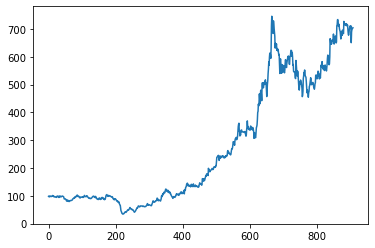

In [29]:
plt.plot(df.Close)

In [30]:
df


,Open,High,Low,Close,Volume
0,96.800003,102.800003,96.800003,98.300003,474708
1,98.300003,99.699997,94.000000,96.949997,468706
2,94.099998,97.199997,91.099998,96.000000,897791
3,95.000000,99.849998,93.550003,97.050003,711118
4,96.150002,100.550003,96.000000,99.699997,215851
...,...,...,...,...,...
904,650.950012,692.349976,650.950012,689.250000,1618098
905,694.700012,706.900024,689.000000,696.950012,741070
906,695.500000,702.900024,687.049988,700.000000,662900
907,699.000000,708.000000,688.000000,701.650024,625008


In [31]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
904    644.633500
905    646.136000
906    647.814500
907    649.455001
908    651.295001
Name: Close, Length: 909, dtype: float64

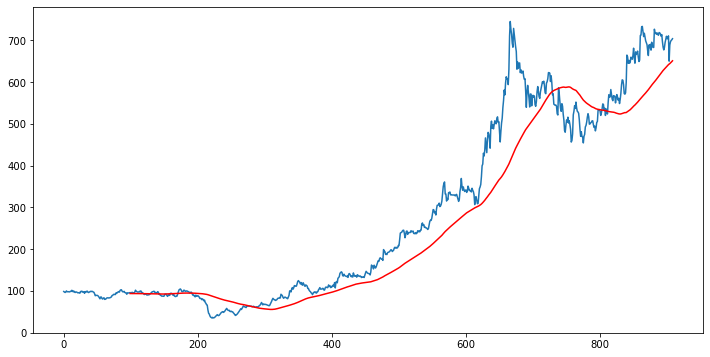

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [33]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
904    588.841250
905    589.557001
906    590.170501
907    590.731251
908    591.363501
Name: Close, Length: 909, dtype: float64

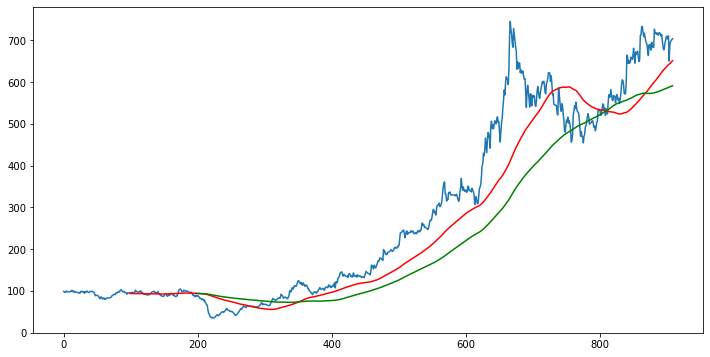

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [35]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(636, 1)
(273, 1)


In [36]:
data_training.head()

,Close
0,98.300003
1,96.949997
2,96.000000
3,97.050003
4,99.699997


In [38]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler =MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.42632354e-01],
       [1.39597609e-01],
       [1.37462065e-01],
       [1.39822418e-01],
       [1.45779468e-01],
       [1.41283571e-01],
       [1.41733171e-01],
       [1.41620767e-01],
       [1.40384405e-01],
       [1.41171184e-01],
       [1.43531520e-01],
       [1.43194341e-01],
       [1.49039004e-01],
       [1.46341455e-01],
       [1.41058780e-01],
       [1.44992690e-01],
       [1.39597609e-01],
       [1.37349661e-01],
       [1.40159597e-01],
       [1.39822418e-01],
       [1.38024052e-01],
       [1.35326521e-01],
       [1.36225686e-01],
       [1.35214116e-01],
       [1.33528155e-01],
       [1.42632354e-01],
       [1.42070367e-01],
       [1.44543107e-01],
       [1.39372818e-01],
       [1.39822418e-01],
       [1.41733171e-01],
       [1.32853763e-01],
       [1.42407545e-01],
       [1.38473635e-01],
       [1.43306728e-01],
       [1.44655494e-01],
       [1.38810831e-01],
       [1.36900078e-01],
       [1.39148027e-01],
       [1.41845558e-01],


In [41]:
x_train = []
y_train = []

for i in range ( 100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)    


In [42]:
#ml model

from keras.layers import Dropout , Dense , LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True,
              input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train  , y_train , epochs = 50)

Epoch 1/50
17/17 [==============================] - 6s 140ms/step - loss: 0.0679
Epoch 2/50
17/17 [==============================] - 2s 141ms/step - loss: 0.0170
Epoch 3/50
17/17 [==============================] - 3s 152ms/step - loss: 0.0099
Epoch 4/50
17/17 [==============================] - 3s 167ms/step - loss: 0.0066
Epoch 5/50
17/17 [==============================] - 2s 144ms/step - loss: 0.0075
Epoch 6/50
17/17 [==============================] - 2s 144ms/step - loss: 0.0077
Epoch 7/50
17/17 [==============================] - 4s 239ms/step - loss: 0.0062
Epoch 8/50
17/17 [==============================] - 6s 350ms/step - loss: 0.0047
Epoch 9/50
17/17 [==============================] - 7s 368ms/step - loss: 0.0056
Epoch 10/50
17/17 [==============================] - 7s 388ms/step - loss: 0.0051
Epoch 11/50
17/17 [==============================] - 6s 377ms/step - loss: 0.0059
Epoch 12/50
17/17 [==============================] - 6s 342ms/step - loss: 0.0051
Epoch 13/50
17/17 [======

In [46]:
model.save('keras_model.h5')

In [47]:
data_testing.head()

,Close
636,441.850006
637,494.649994
638,506.600006
639,489.200012
640,497.850006


In [48]:
past_100_days = data_training.tail(100)

In [51]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-51-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [52]:
final_df.head()

,Close
0,256.649994
1,258.649994
2,251.949997
3,252.899994
4,250.850006


In [54]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(373, 1)

In [55]:
x_test = []
y_test = []

for i in range (100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i , 0])

In [58]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(273, 100, 1)
(273,)


In [59]:
#make prediction

y_prediction = model.predict(x_test)

9/9 [==============================] - 1s 56ms/step


In [60]:
y_prediction.shape

(273, 1)

In [61]:
y_test

array([0.39089453, 0.49679102, 0.52075815, 0.48586045, 0.50320901,
       0.48385483, 0.50451265, 0.52246294, 0.51032892, 0.50812273,
       0.53329319, 0.54151629, 0.51464099, 0.51805056, 0.47061776,
       0.42077819, 0.47041718, 0.51093065, 0.53519855, 0.5859406 ,
       0.61963504, 0.6703771 , 0.64721226, 0.7033695 , 0.7340554 ,
       0.72442847, 0.72442847, 0.6964501 , 0.76915367, 0.9312074 ,
       1.        , 0.96199356, 0.93732451, 0.89530683, 0.87625348,
       0.96670683, 0.93752514, 0.9069395 , 0.87906139, 0.85559567,
       0.77055763, 0.8051545 , 0.77436823, 0.78710396, 0.80084238,
       0.7540113 , 0.76754921, 0.75180505, 0.75521462, 0.76183313,
       0.73596076, 0.7215203 , 0.72482949, 0.66436025, 0.5872443 ,
       0.66145208, 0.69273964, 0.6626554 , 0.63036504, 0.58894903,
       0.65142401, 0.65062171, 0.59446447, 0.64029286, 0.64490575,
       0.63598074, 0.64209784, 0.60018055, 0.59215808, 0.61542318,
       0.66255515, 0.68702369, 0.66355796, 0.63888891, 0.63016

In [62]:
y_prediction

array([[0.29567087],
       [0.3118019 ],
       [0.32741278],
       [0.34268892],
       [0.35762513],
       [0.37220532],
       [0.38628197],
       [0.39977723],
       [0.41270667],
       [0.42503154],
       [0.4366839 ],
       [0.44770795],
       [0.45818573],
       [0.46805352],
       [0.47724348],
       [0.4854926 ],
       [0.49235362],
       [0.49777716],
       [0.5020539 ],
       [0.50562996],
       [0.50910985],
       [0.5130977 ],
       [0.5181953 ],
       [0.52463365],
       [0.5326386 ],
       [0.54236484],
       [0.5536956 ],
       [0.5663228 ],
       [0.57968754],
       [0.5935954 ],
       [0.60866195],
       [0.62569195],
       [0.64492315],
       [0.66600215],
       [0.68803746],
       [0.70998436],
       [0.7315083 ],
       [0.752216  ],
       [0.7716145 ],
       [0.7891856 ],
       [0.8044916 ],
       [0.8168505 ],
       [0.8261991 ],
       [0.83260226],
       [0.83643675],
       [0.83825976],
       [0.8383693 ],
       [0.837

In [63]:
scaler.scale_

array([0.00200562])

In [64]:
scale_factor = 1/0.00200562
y_prediction = y_prediction * scale_factor
y_test = y_test * scale_factor

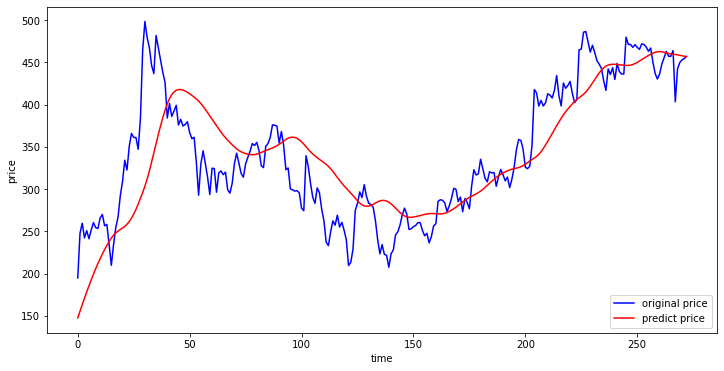

In [66]:
plt.figure(figsize = (12, 6))
plt.plot(y_test , 'b' , label = 'original price')
plt.plot(y_prediction , 'r' , label = 'predict price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()